In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import accuracy_score
from sklearn.preprocessing   import StandardScaler

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier

In [16]:
df = pd.read_csv("C:/Users/ISD/Python_ali/fault_detection/Pv_Data2.csv")
df;
X = df.drop(['Target'],axis=1).values

Y=df.loc[:,'Target']
X.shape

(1600, 7)

In [17]:
pca = PCA(n_components=7)

In [18]:
pca.fit(X)

PCA(n_components=7)

In [19]:
X_pca = pca.transform(X)

In [20]:
trainX, testX,trainY,testY = train_test_split(X_pca ,Y, test_size=0.3, random_state=0)

In [21]:
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)

In [22]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(trainX,trainY);

In [23]:
ypred=model.predict(trainX)

In [24]:
c=accuracy_score(trainY,ypred)*100
c

96.42857142857143

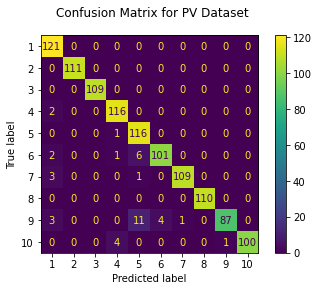

In [25]:
fig = plot_confusion_matrix(model,trainX,trainY, display_labels=model.classes_)
fig.figure_.suptitle("Confusion Matrix for PV Dataset")
plt.show()

In [26]:
ypred1=model.predict(testX)

In [27]:
c=accuracy_score(testY,ypred1)*100
c

92.70833333333334

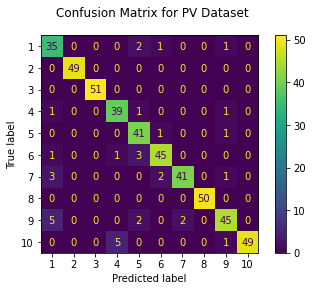

In [28]:
fig = plot_confusion_matrix(model,testX,testY, display_labels=model.classes_)
fig.figure_.suptitle("Confusion Matrix for PV Dataset")
plt.show()

In [29]:
YR=np.concatenate((trainY,testY),axis=0)

In [30]:
YP = np.concatenate((ypred,ypred1), axis=0)

In [31]:
ac2=accuracy_score(YR,YP)*100
ac2

95.3125

In [32]:
c2=confusion_matrix(YR,YP)
c2

array([[156,   0,   0,   0,   2,   1,   0,   0,   1,   0],
       [  0, 160,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 160,   0,   0,   0,   0,   0,   0,   0],
       [  3,   0,   0, 155,   1,   0,   0,   0,   1,   0],
       [  0,   0,   0,   1, 157,   1,   0,   0,   1,   0],
       [  3,   0,   0,   2,   9, 146,   0,   0,   0,   0],
       [  6,   0,   0,   0,   1,   2, 150,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 160,   0,   0],
       [  8,   0,   0,   0,  13,   4,   3,   0, 132,   0],
       [  0,   0,   0,   9,   0,   0,   0,   0,   2, 149]], dtype=int64)